In [ ]:
#Perform Principal component analysis and perform clustering using first 
#3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
#optimum number of clusters and check whether we have obtained same number of clusters with the original data 
#(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\MS_More\Desktop\Data Science\Materials\A8\wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [6]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

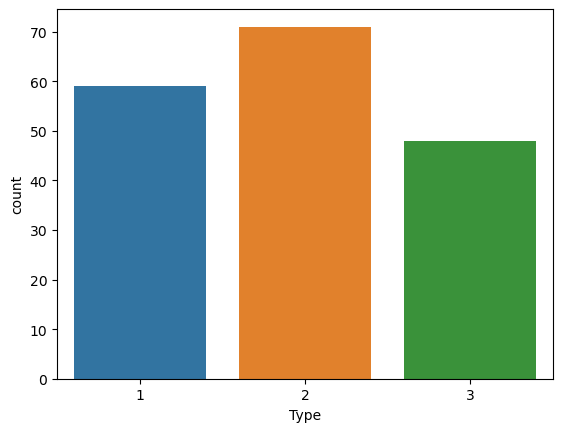

In [7]:
sns.countplot(df['Type'])

In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


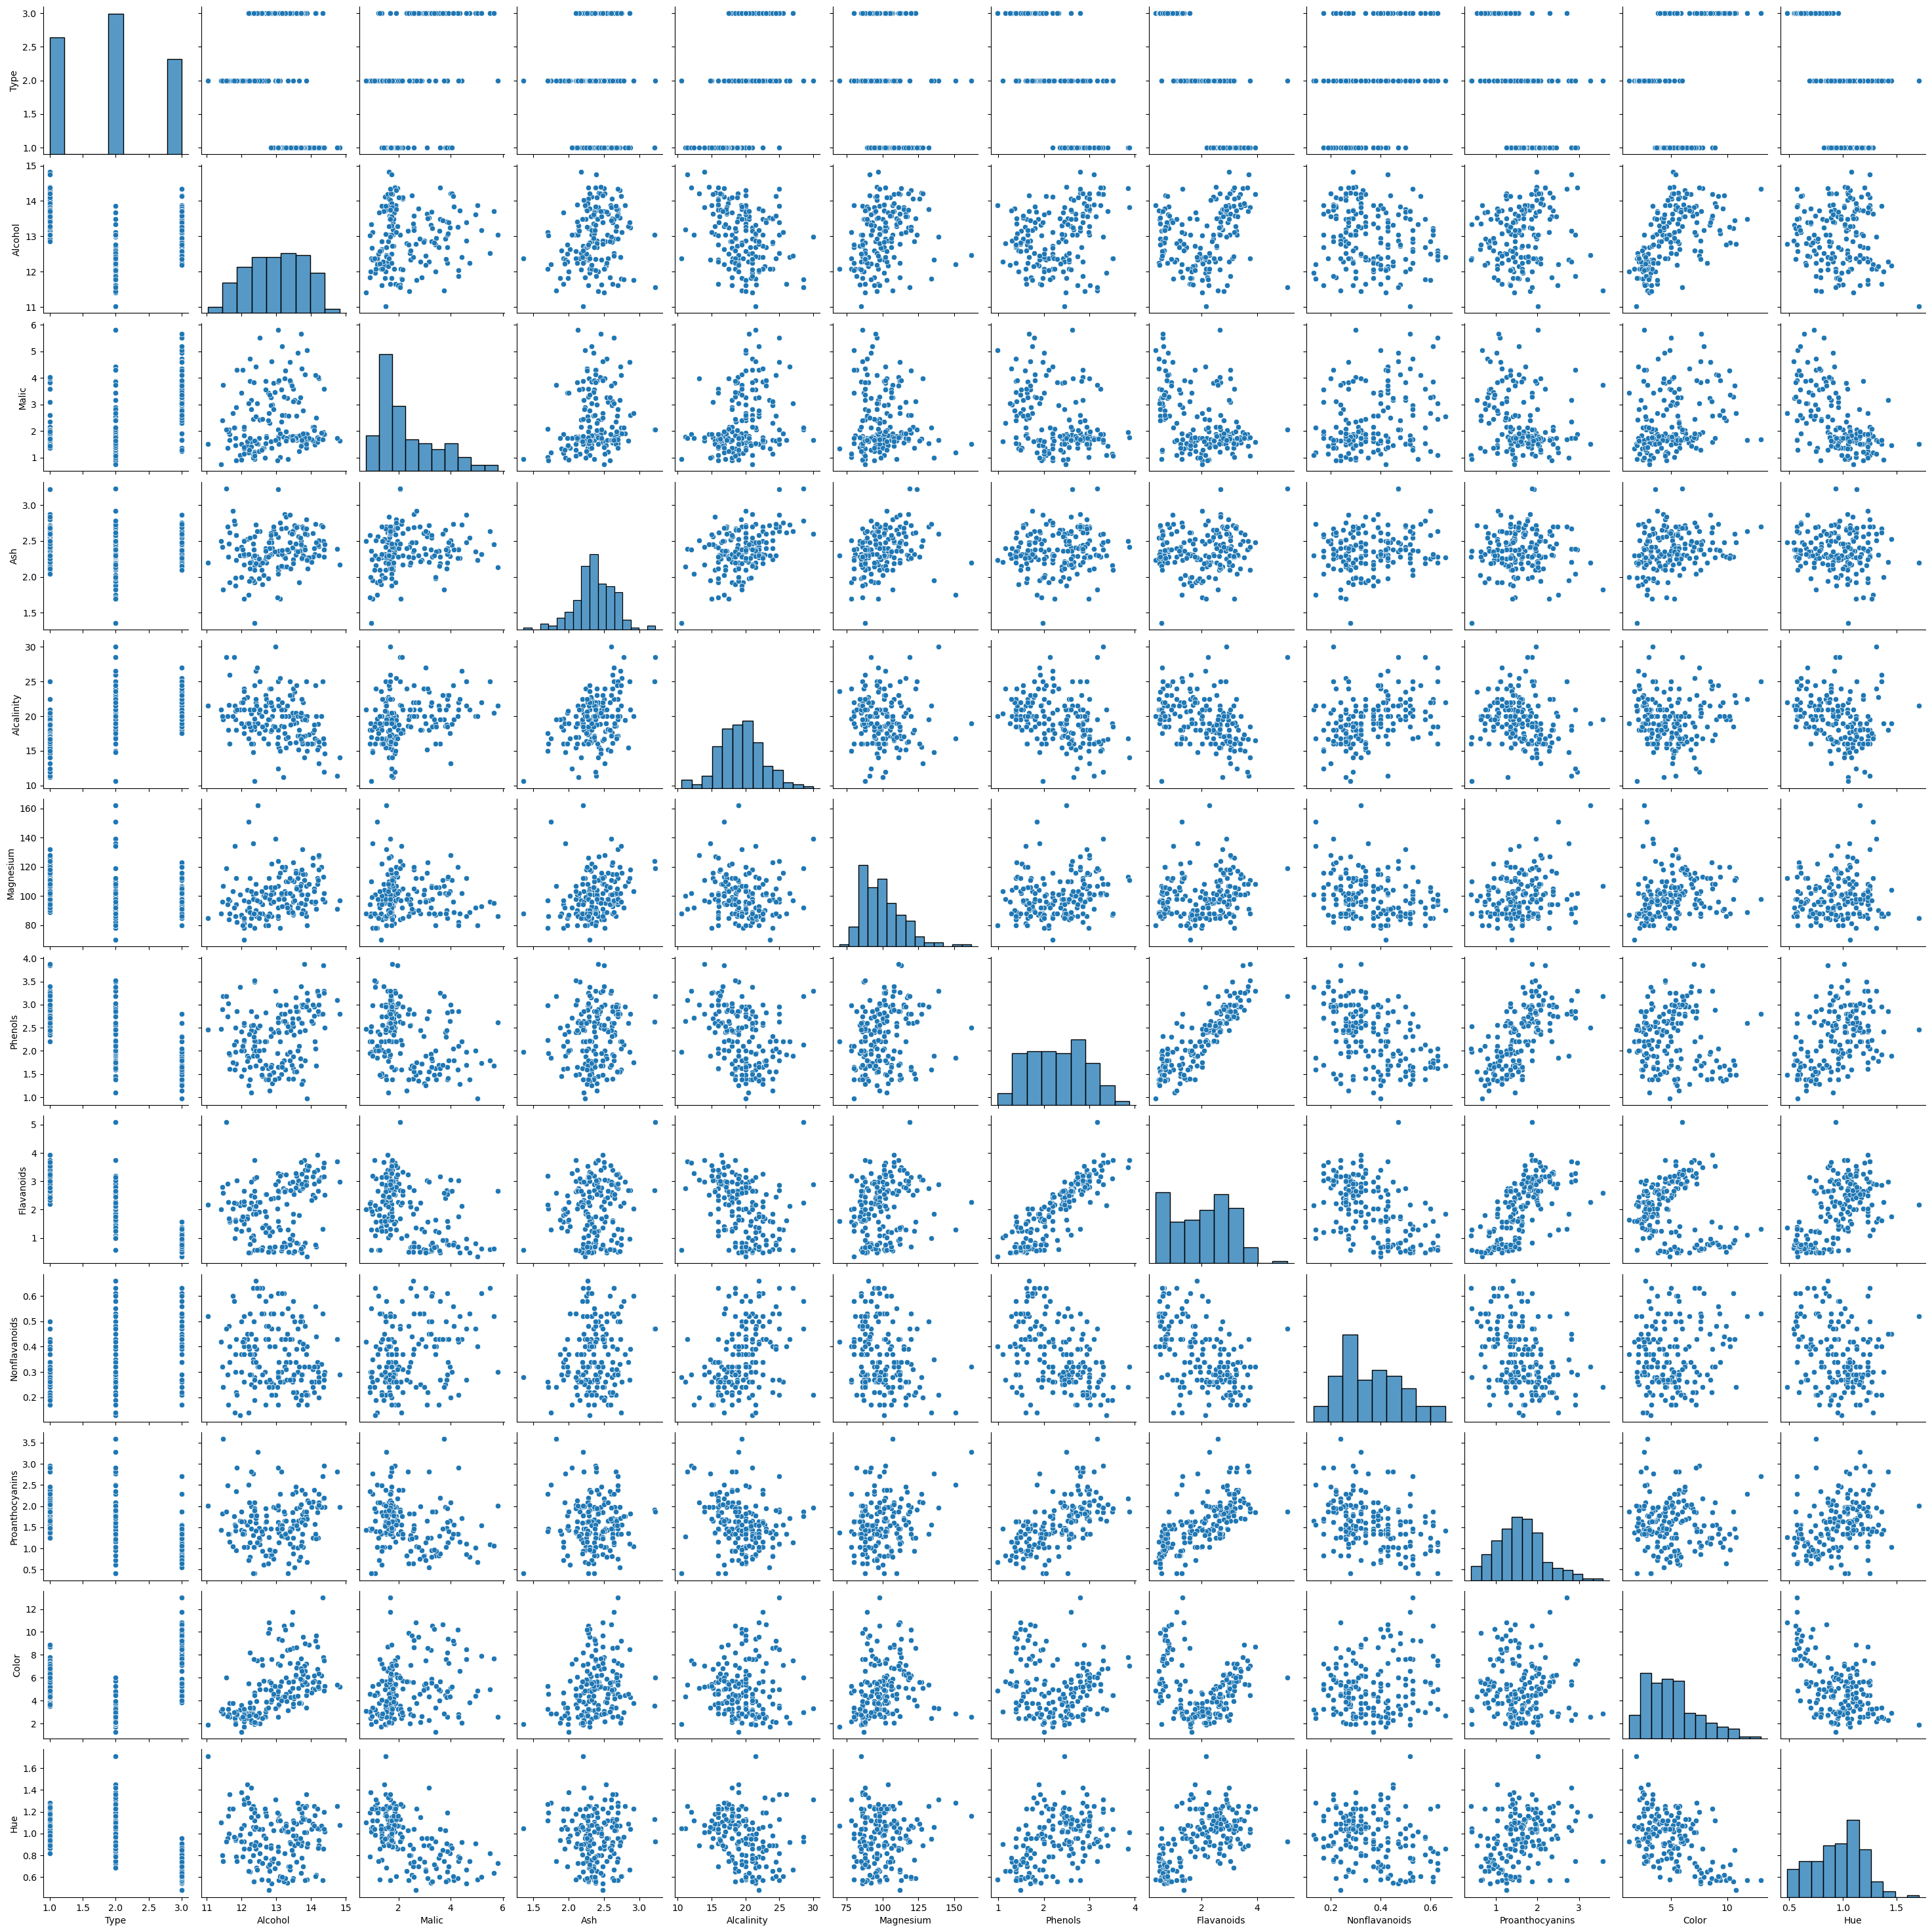

In [10]:
sns.pairplot(df.iloc[:,0:12])

In [11]:
x = df.iloc[:,:-1]
y = df['Type']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=1)

In [13]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.96        13
           3       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [16]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(x)
np.cumsum(pca.explained_variance_ratio_)

array([0.3996507 , 0.56735564, 0.67655902, 0.74488863, 0.81016972,
       0.86165837, 0.90414508, 0.93095261, 0.951241  , 0.97119898,
       0.98424227, 0.99466551, 1.        ])

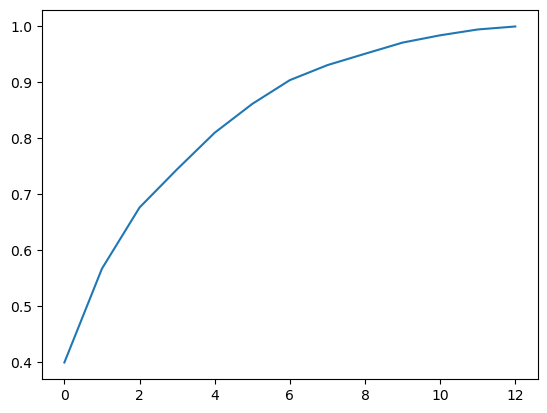

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [21]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs = pd.DataFrame(pcs, columns=['PC1','PC2','PC3'])
pcs

,PC1,PC2,PC3
0,-3.260580,1.736054,-0.405701
1,-2.358620,-0.509786,-1.937094
2,-2.453376,1.120704,0.892834
3,-3.253148,2.686416,-0.411249
4,-1.403734,1.320100,1.854434
...,...,...,...
173,3.886054,1.707484,-0.443465
174,3.148970,1.386257,0.127645
175,3.384134,2.255285,-1.133039
176,3.078204,1.791104,-0.639500


In [22]:
pcs['Class']=y

In [23]:
pcs

,PC1,PC2,PC3,Class
0,-3.260580,1.736054,-0.405701,1
1,-2.358620,-0.509786,-1.937094,1
2,-2.453376,1.120704,0.892834,1
3,-3.253148,2.686416,-0.411249,1
4,-1.403734,1.320100,1.854434,1
...,...,...,...,...
173,3.886054,1.707484,-0.443465,3
174,3.148970,1.386257,0.127645,3
175,3.384134,2.255285,-1.133039,3
176,3.078204,1.791104,-0.639500,3


In [24]:
x = pcs.iloc[:,:-1]
y = pcs['Class']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=1)

In [26]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [27]:
from scipy.cluster import hierarchy

In [28]:
lk = hierarchy.linkage(x,method='complete')

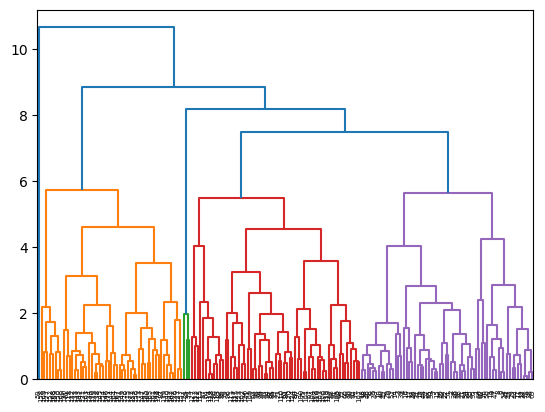

In [29]:
dendrogram = hierarchy.dendrogram(lk)

In [30]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans()

cluster = km.fit_predict(x)
cluster

array([4, 1, 2, 4, 2, 4, 4, 2, 4, 4, 4, 1, 1, 4, 4, 2, 2, 2, 4, 4, 4, 2,
       1, 1, 2, 7, 2, 1, 2, 4, 2, 4, 1, 2, 2, 2, 2, 1, 1, 4, 4, 1, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 3, 3, 3, 1, 6, 1,
       1, 3, 3, 1, 3, 2, 6, 7, 1, 3, 3, 3, 1, 6, 3, 1, 6, 0, 1, 1, 6, 6,
       6, 6, 6, 6, 6, 1, 1, 2, 6, 3, 1, 1, 3, 3, 6, 3, 3, 6, 3, 6, 3, 1,
       1, 3, 6, 6, 6, 6, 3, 6, 3, 3, 6, 7, 7, 1, 1, 6, 1, 6, 6, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5,
       0, 5, 5, 0, 5, 5, 0, 0, 0, 0, 5, 0, 5, 0, 5, 5, 0, 0, 5, 5, 5, 5,
       5, 5])

In [32]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    wcss.append(km.inertia_)
wcss

[1565.5575835065338,
 823.8982493910777,
 490.47987169492495,
 409.67875437354826,
 352.17408316846775,
 306.39503502275227,
 268.9578183743763,
 242.38426367377542,
 219.914229885972]

Text(0, 0.5, 'wcss')

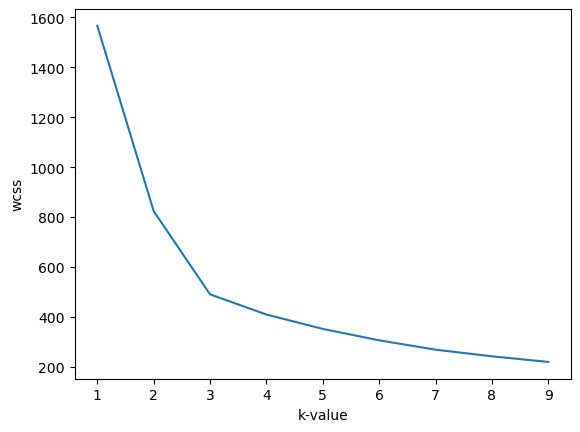

In [33]:
plt.plot(range(1,10),wcss)
plt.xlabel('k-value')
plt.xlabel('k-value')
plt.ylabel('wcss')

In [35]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs = pd.DataFrame(pcs,columns=['pc1','pc2','pc3'])

In [36]:
pcs

,pc1,pc2,pc3
0,-3.260580,1.736054,-0.405701
1,-2.358620,-0.509786,-1.937094
2,-2.453376,1.120704,0.892834
3,-3.253148,2.686416,-0.411249
4,-1.403734,1.320100,1.854434
...,...,...,...
173,3.886054,1.707484,-0.443465
174,3.148970,1.386257,0.127645
175,3.384134,2.255285,-1.133039
176,3.078204,1.791104,-0.639500


In [37]:
z = df['Type']

In [38]:
pcs['class'] = z

In [39]:
pcs

,pc1,pc2,pc3,class
0,-3.260580,1.736054,-0.405701,1
1,-2.358620,-0.509786,-1.937094,1
2,-2.453376,1.120704,0.892834,1
3,-3.253148,2.686416,-0.411249,1
4,-1.403734,1.320100,1.854434,1
...,...,...,...,...
173,3.886054,1.707484,-0.443465,3
174,3.148970,1.386257,0.127645,3
175,3.384134,2.255285,-1.133039,3
176,3.078204,1.791104,-0.639500,3


In [40]:
pcs['class']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64